# Combining AirBNB and Foursquare API data in Berlin

## Introduction

As part of the lodging sector, you want to invest in a new hotel, B&B or just want to rent a flat through Airbnb. Before investing, you need to know what neighborhood would be a nice choice and a good price would be in the neighborhood you choose. It is also a good idea to invest in a neighborhood with good facilities, restaurants, cafes, parks and tourist locations, so people find your place convenient when they're traveling.

The goal of this project is to provide some guidance about where it would be a good idea to invest, what neighborhoods of a city are better than others, and give you an idea of the average price for an Airbnb in the area.

## Data

To solve this problem, we are going to use the data provided by the **Foursquare API**, as well as data from the Airbnb database for Berlin. This data is part of the project **InsideAirbnb**, and is publicly available in http://insideairbnb.com/get-the-data.html, along with information from other major cities in the world.

Specifically, we will use the file called **listings.csv**. This file contains the information about available places in Airbnb in Berlin, and includes information related to the neighborhood, burough and coordinates for each place.

Let's import *pandas* and put the file into a dataframe to check its contents.

In [4]:
import pandas as pd

In [5]:
## Read the CSV file into a pandas dataframe and check the contents.

airbnb = pd.read_csv('listings.csv')
airbnb.head()

,id,listing_url,scrape_id,last_scraped,name,summary,space,description,experiences_offered,neighborhood_overview,...,instant_bookable,is_business_travel_ready,cancellation_policy,require_guest_profile_picture,require_guest_phone_verification,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month
0,3176,https://www.airbnb.com/rooms/3176,20200218053611,2020-02-18,Fabulous Flat in great Location,This beautiful first floor apartment is situa...,1st floor (68m2) apartment on Kollwitzplatz/ P...,This beautiful first floor apartment is situa...,none,The neighbourhood is famous for its variety of...,...,f,f,strict_14_with_grace_period,f,f,1,1,0,0,1.12
1,3309,https://www.airbnb.com/rooms/3309,20200218053611,2020-02-19,BerlinSpot Schöneberg near KaDeWe,First of all: I prefer short-notice bookings. ...,"Your room is really big and has 26 sqm, is ver...",First of all: I prefer short-notice bookings. ...,none,"My flat is in the middle of West-Berlin, direc...",...,f,f,strict_14_with_grace_period,f,f,1,0,1,0,0.34
2,6883,https://www.airbnb.com/rooms/6883,20200218053611,2020-02-19,Stylish East Side Loft in Center with AC & 2 b...,NaN,Stay in a stylish loft on the second floor and...,Stay in a stylish loft on the second floor and...,none,The emerging and upcoming East of the new hip ...,...,f,f,moderate,f,t,1,1,0,0,1.08
3,7071,https://www.airbnb.com/rooms/7071,20200218053611,2020-02-18,BrightRoom with sunny greenview!,Cozy and large room in the beautiful district ...,"The BrightRoom is an approx. 20 sqm (215ft²), ...",Cozy and large room in the beautiful district ...,none,"Great neighborhood with plenty of Cafés, Baker...",...,f,f,moderate,f,f,2,0,2,0,2.24
4,9991,https://www.airbnb.com/rooms/9991,20200218053611,2020-02-18,Geourgeous flat - outstanding views,4 bedroom with very large windows and outstand...,"THE APPARTMENT - 4 bedroom (US, Germany: 5 roo...",4 bedroom with very large windows and outstand...,none,Prenzlauer Berg is an amazing neighbourhood wh...,...,f,f,strict_14_with_grace_period,f,f,1,1,0,0,0.15


We have a lot of informatiom from this file, but we only will be using a few of those columns. In particular, we are interested in the following data:

* **Neighborhood (neighbourhood_cleansed):** The neighborhood where the Airbnb is located.
* **Borough (neighbourhood_group_cleansed):** Each one of the 12 Boroughs of Berlin.
* **Price:** We want to get the average price per person for each neighborhood. We will use the columns **price** and **accommodates** for this.
* **Latitude / Longitude:** Since we don't have location data for each neighborhood, we will use these to approximate the center of each one.


Let's create a copy dataframe with the rows we need.

In [8]:
airbnb_refined = airbnb[['neighbourhood_cleansed','neighbourhood_group_cleansed','price','accommodates','latitude','longitude']].copy()
airbnb_refined

,neighbourhood_cleansed,neighbourhood_group_cleansed,price,accommodates,latitude,longitude
0,Prenzlauer Berg Südwest,Pankow,$90.00,4,52.535000,13.417580
1,Schöneberg-Nord,Tempelhof - Schöneberg,$28.00,1,52.498850,13.349060
2,Frankfurter Allee Süd FK,Friedrichshain-Kreuzberg,$125.00,2,52.511710,13.454770
3,Helmholtzplatz,Pankow,$33.00,2,52.543160,13.415090
4,Prenzlauer Berg Südwest,Pankow,$180.00,7,52.533030,13.416050
...,...,...,...,...,...,...
25192,Tiergarten Süd,Mitte,$249.00,8,52.505190,13.350660
25193,Moabit Ost,Mitte,$50.00,2,52.522120,13.351210
25194,südliche Luisenstadt,Friedrichshain-Kreuzberg,$38.00,2,52.499230,13.441180
25195,Hellersdorf-Nord,Marzahn - Hellersdorf,$16.00,2,52.541520,13.606460


And let's calculate the price per person for each of the locations. The price tag is stored as a string with some additional characters, so we need to do some replacements before calculating the final price.

In [12]:
airbnb_refined['price per person'] = airbnb_refined['price'].str.replace('$','')\
                                                            .str.replace('\.00', '')\
                                                            .str.replace(',','')\
                                                            .astype(int)\
                                                            /airbnb_refined['accommodates']
airbnb_refined

,neighbourhood_cleansed,neighbourhood_group_cleansed,price,accommodates,latitude,longitude,price per person
0,Prenzlauer Berg Südwest,Pankow,$90.00,4,52.535000,13.417580,22.500000
1,Schöneberg-Nord,Tempelhof - Schöneberg,$28.00,1,52.498850,13.349060,28.000000
2,Frankfurter Allee Süd FK,Friedrichshain-Kreuzberg,$125.00,2,52.511710,13.454770,62.500000
3,Helmholtzplatz,Pankow,$33.00,2,52.543160,13.415090,16.500000
4,Prenzlauer Berg Südwest,Pankow,$180.00,7,52.533030,13.416050,25.714286
...,...,...,...,...,...,...,...
25192,Tiergarten Süd,Mitte,$249.00,8,52.505190,13.350660,31.125000
25193,Moabit Ost,Mitte,$50.00,2,52.522120,13.351210,25.000000
25194,südliche Luisenstadt,Friedrichshain-Kreuzberg,$38.00,2,52.499230,13.441180,19.000000
25195,Hellersdorf-Nord,Marzahn - Hellersdorf,$16.00,2,52.541520,13.606460,8.000000


## Methodology

### 1. Calculating neighborhood coordinates

For clustering purposes, we want to have information for each one of the neighborhoods. We are specially interested in having at least aproximate values of the coordinates of each neighborhood, to be able to use them with the Foursquare API. We can calculate these values using the averages of the coordinates of every AirBNB location in our dataframe, and check in a map if this actually corresponds to the neighborhood center.

We will create a Dataframe containing only **neighbourhood**, **neighbourhood_group**, the average values for **latitude**, **longitude** and **price** and the total count values per neighborhood.

In [25]:
## Create a dataframe only with the neighborhoods and their grouped data

neighborhood_df = airbnb_refined[['neighbourhood_cleansed',
                                  'neighbourhood_group_cleansed',
                                  'latitude',
                                  'longitude',
                                  'price per person']]\
                                  .groupby(['neighbourhood_cleansed',
                                            'neighbourhood_group_cleansed']).mean().reset_index()
neighborhood_df

,neighbourhood_cleansed,neighbourhood_group_cleansed,latitude,longitude,price per person
0,Adlershof,Treptow - Köpenick,52.436802,13.547116,21.480108
1,Albrechtstr.,Steglitz - Zehlendorf,52.455627,13.337145,21.646389
2,Alexanderplatz,Mitte,52.522387,13.404324,61.899000
3,Allende-Viertel,Treptow - Köpenick,52.447843,13.598447,22.087302
4,Alt Treptow,Treptow - Köpenick,52.490437,13.450552,23.093964
...,...,...,...,...,...
132,Wilhelmstadt,Spandau,52.525758,13.189837,25.102564
133,Zehlendorf Nord,Steglitz - Zehlendorf,52.447411,13.261869,31.175571
134,Zehlendorf Südwest,Steglitz - Zehlendorf,52.421631,13.172213,27.789003
135,nördliche Luisenstadt,Friedrichshain-Kreuzberg,52.501651,13.427058,26.680173


Let's add the total amount of Airbnb hosts in each neighborhood.

In [26]:
neighborhood_df = neighborhood_df.join(airbnb[['neighbourhood_cleansed','host_id']].groupby('neighbourhood_cleansed').count(), on = 'neighbourhood_cleansed')
neighborhood_df

,neighbourhood_cleansed,neighbourhood_group_cleansed,latitude,longitude,price per person,host_id
0,Adlershof,Treptow - Köpenick,52.436802,13.547116,21.480108,31
1,Albrechtstr.,Steglitz - Zehlendorf,52.455627,13.337145,21.646389,119
2,Alexanderplatz,Mitte,52.522387,13.404324,61.899000,1255
3,Allende-Viertel,Treptow - Köpenick,52.447843,13.598447,22.087302,3
4,Alt Treptow,Treptow - Köpenick,52.490437,13.450552,23.093964,185
...,...,...,...,...,...,...
132,Wilhelmstadt,Spandau,52.525758,13.189837,25.102564,39
133,Zehlendorf Nord,Steglitz - Zehlendorf,52.447411,13.261869,31.175571,73
134,Zehlendorf Südwest,Steglitz - Zehlendorf,52.421631,13.172213,27.789003,59
135,nördliche Luisenstadt,Friedrichshain-Kreuzberg,52.501651,13.427058,26.680173,475


Also, let's setup the column names for consistency and simplicity.

In [29]:
neighborhood_df.columns = ['Neighborhood','Borough','Latitude','Longitude','Avg Price','Total Count']
neighborhood_df

,Neighborhood,Borough,Latitude,Longitude,Avg Price,Total Count
0,Adlershof,Treptow - Köpenick,52.436802,13.547116,21.480108,31
1,Albrechtstr.,Steglitz - Zehlendorf,52.455627,13.337145,21.646389,119
2,Alexanderplatz,Mitte,52.522387,13.404324,61.899000,1255
3,Allende-Viertel,Treptow - Köpenick,52.447843,13.598447,22.087302,3
4,Alt Treptow,Treptow - Köpenick,52.490437,13.450552,23.093964,185
...,...,...,...,...,...,...
132,Wilhelmstadt,Spandau,52.525758,13.189837,25.102564,39
133,Zehlendorf Nord,Steglitz - Zehlendorf,52.447411,13.261869,31.175571,73
134,Zehlendorf Südwest,Steglitz - Zehlendorf,52.421631,13.172213,27.789003,59
135,nördliche Luisenstadt,Friedrichshain-Kreuzberg,52.501651,13.427058,26.680173,475


It looks like we have **137** neighbourhoods, which is an interesting number. For verification purposes, we want to check that these values actually make sense on a map. We can use **folium** to plot a map, centered on one neighbourhood, and add markers on the map for all the locations, as well as a central marker with the average coordinates of those locations. This will show us if our assumption was correct.

First, let's import **folium**.

In [32]:
import folium

Now, let's define some variables for our map. We will use an **index** variable to get all the data from the **neighborhood_df** dataframe. Let's start with a value of **index = 0**, which identifies the first neighborhood in our list: ***Adlershof***.

In [33]:
index = 0
name = neighborhood_df.loc[index,'Neighborhood']
latitude = neighborhood_df.loc[index,'Latitude']
longitude = neighborhood_df.loc[index,'Longitude']

## Filter only the locations that belong to that neighbourhood
locations = airbnb[airbnb['neighbourhood'] == name][['host_id','latitude','longitude']]
locations.head()

,host_id,latitude,longitude
835,5565633,52.43550,13.55125
1125,901417,52.43673,13.55173
1628,13820913,52.44005,13.54701
4312,36608618,52.43828,13.55212
6274,30778641,52.43891,13.55017


Let's create and plot the map. This will plot a green dot for each location, and a slightly bigger red dot in the calculated center of the neighbourhood.

In [34]:
# Create Map
neighborhood_map = folium.Map(location = [latitude, longitude], zoom_start = 14)

for lat, lon, host_id in zip(locations['latitude'], locations['longitude'], locations['host_id']):

    label = folium.Popup(host_id)
    folium.CircleMarker([lat,lon],
                        radius = 2,
                        color = 'green').add_to(neighborhood_map)

folium.CircleMarker([latitude, longitude], radius = 5, color = 'red').add_to(neighborhood_map)
print(name + " has a total " + str(locations.shape[0]) + " locations in the database.\n")
neighborhood_map

Adlershof has a total 31 locations in the database.



It looks like our assumption makes sense. Let's create maps for a few of the most popular and touristic areas in Berlin: **Alexanderplatz**, **Neukölln**, and **Frankfurter Allee Süd**:

#### Alexanderplatz

In [95]:
## Get the index value for Alexanderplatz
index = neighborhood_df.index[neighborhood_df['Neighborhood'] == 'Alexanderplatz'].tolist()[0]

name = neighborhood_df.loc[index,'Neighborhood']
latitude = neighborhood_df.loc[index,'Latitude']
longitude = neighborhood_df.loc[index,'Longitude']
locations = airbnb[airbnb['neighbourhood_cleansed'] == name][['host_id','latitude','longitude']]

neighborhood_map = folium.Map(location = [latitude, longitude], zoom_start = 14)

for lat, lon, host_id in zip(locations['latitude'], locations['longitude'], locations['host_id']):

    label = folium.Popup(host_id)
    folium.CircleMarker([lat,lon],
                        radius = 2,
                        color = 'green').add_to(neighborhood_map)

folium.CircleMarker([latitude, longitude], radius = 5, color = 'red').add_to(neighborhood_map)
print(name + " has a total " + str(locations.shape[0]) + " locations in the database.\n")
neighborhood_map

Alexanderplatz has a total 1255 locations in the database.



#### Neuköllner Mitte/Zentrum

In [46]:
## Get the index value for Neuköllner Mitte/Zentrum
index = neighborhood_df.index[neighborhood_df['Neighborhood'] == 'Neuköllner Mitte/Zentrum'].tolist()[0]

name = neighborhood_df.loc[index,'Neighborhood']
latitude = neighborhood_df.loc[index,'Latitude']
longitude = neighborhood_df.loc[index,'Longitude']
locations = airbnb[airbnb['neighbourhood_cleansed'] == name][['host_id','latitude','longitude']]

neighborhood_map = folium.Map(location = [latitude, longitude], zoom_start = 14)

for lat, lon, host_id in zip(locations['latitude'], locations['longitude'], locations['host_id']):

    label = folium.Popup(host_id)
    folium.CircleMarker([lat,lon],
                        radius = 2,
                        color = 'green').add_to(neighborhood_map)

folium.CircleMarker([latitude, longitude], radius = 5, color = 'red').add_to(neighborhood_map)
print(name + " has a total " + str(locations.shape[0]) + " locations in the database.\n")
neighborhood_map

Neuköllner Mitte/Zentrum has a total 842 locations in the database.



#### Frankfurter Allee Süd

In [48]:
## Get the index value for Frankfurter Allee Süd FK
index = neighborhood_df.index[neighborhood_df['Neighborhood'] == 'Frankfurter Allee Süd FK'].tolist()[0]

name = neighborhood_df.loc[index,'Neighborhood']
latitude = neighborhood_df.loc[index,'Latitude']
longitude = neighborhood_df.loc[index,'Longitude']
locations = airbnb[airbnb['neighbourhood_cleansed'] == name][['host_id','latitude','longitude']]

neighborhood_map = folium.Map(location = [latitude, longitude], zoom_start = 14)

for lat, lon, host_id in zip(locations['latitude'], locations['longitude'], locations['host_id']):

    label = folium.Popup(host_id)
    folium.CircleMarker([lat,lon],
                        radius = 2,
                        color = 'green').add_to(neighborhood_map)

folium.CircleMarker([latitude, longitude], radius = 5, color = 'red').add_to(neighborhood_map)
print(name + " has a total " + str(locations.shape[0]) + " locations in the database.\n")
neighborhood_map

Frankfurter Allee Süd FK has a total 1466 locations in the database.



This looks great. We have now a dataframe containing reliable coordinates for the neighborhoods in Berlin.

### 2. Getting venue information for each neighborhood from the Foursquare API

We are going to start analyzing the venues in each of the neighbourhoods of Berlin.

In order to protect the privacy of the credentials, I have created a file called **API_Credentials.json**, with the following format:

```json
{
    "CLIENT_ID": "your_client_id",
    "CLIENT_SECRET": "your_client_secret",
    "VERSION": "your_version"
}
```

This allows the notebook to work with any credentials, as long as you create a file with a similar syntax. Now, we only need to load the file and import the values.

We will need to import **json**, **requests** and **json_normalize** in order to work with this data.

In [52]:
import json
from pandas.io.json import json_normalize
import requests

In [53]:
credentials = json.load(open('API_Credentials.json'))

CLIENT_ID = credentials['CLIENT_ID']
CLIENT_SECRET = credentials['CLIENT_SECRET']
VERSION = credentials['VERSION']

#### Exploring one neighbourhood in our dataframe

Let's start by analyzing Alexanderplatz, which is the third item in our list, and therefore has value of **index = 2**

In [54]:
neighborhood_df.loc[2]

Neighborhood    Alexanderplatz
Borough                  Mitte
Latitude               52.5224
Longitude              13.4043
Avg Price               61.899
Total Count               1255
Name: 2, dtype: object

Let's define a Foursquare URL to get the top 100 venues within a radius of 500 metres.

In [55]:
limit = 100
radius = 500
latitude = neighborhood_df.loc[2,'Latitude']
longitude = neighborhood_df.loc[2,'Longitude']

url = 'https://api.foursquare.com/v2/venues/explore?client_id={}\
       &client_secret={}&ll={},{}&v={}&radius={}&limit={}'.format(CLIENT_ID,
                                                                  CLIENT_SECRET,
                                                                  latitude,
                                                                  longitude,
                                                                  VERSION,
                                                                  radius,
                                                                  limit)

Let's send the GET request.

In [56]:
results = requests.get(url).json()

Just like we did in the course labs, we are going to re use the function that extracts the category for a venue, given the content of the JSON file for that venue.

In [57]:
def get_category_type(row):
    try:
        categories_list = row['categories']
    except:
        categories_list = row['venue.categories']
        
    if len(categories_list) == 0:
        return None
    else:
        return categories_list[0]['name']

Now, let's clean the JSON file and build a *pandas* dataframe.

In [58]:
venues = json_normalize(results['response']['groups'][0]['items'])

filtered_columns = ['venue.name','venue.categories','venue.location.lat','venue.location.lng']
venues = venues.loc[:, filtered_columns]

venues['venue.categories'] = venues.apply(get_category_type,axis = 1)

venues.columns = [col.split(".")[-1] for col in venues.columns]
venues

,name,categories,lat,lng
0,19grams,Coffee Shop,52.522697,13.407440
1,Die Hackeschen Höfe,Monument / Landmark,52.524094,13.402157
2,Barrio Weine Berlin,Wine Shop,52.523531,13.405946
3,Hackescher Markt,Plaza,52.522993,13.402378
4,Waffel oder Becher,Ice Cream Shop,52.521007,13.403815
...,...,...,...,...
95,Hundt Hammer Stein,Bookstore,52.525790,13.407068
96,Ace & Tate,Optical Shop,52.526328,13.407714
97,Atrium Lobby Lounge & Bar,Hotel Bar,52.519597,13.402774
98,Berliner Fernsehturm,Scenic Lookout,52.520936,13.410007


Let's check how many hotels and restaurants are in this neighborhood.

In [97]:
## Number of venues identified as "Hotel" by Foursquare.

venues[venues['categories'].str.contains('Hotel')].shape[0]

8

In [60]:
## Number of venues identified as "Restaurant" by Foursquare.

venues[venues['categories'].str.contains('Restaurant')].shape[0]

12

#### Getting information for all the neighborhoods

Now, let's define a function to repeat this process iteratively. We are going to re use the function **getNearbyVenues** from the courses, but with a few modifications so we only return the number of hotels and restaurants, given a certain neighborhood.

In [61]:
def getNearbyVenues(neighborhood, latitude, longitude, radius = 500):
    
    ## Create the API request URL
    url = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}'.format(CLIENT_ID,
                                                                                                                                CLIENT_SECRET,
                                                                                                                                VERSION,
                                                                                                                                latitude,
                                                                                                                                longitude,
                                                                                                                                radius,
                                                                                                                                limit)
    
    results = requests.get(url).json()
    
    venues = json_normalize(results['response']['groups'][0]['items'])
    filtered_columns = ['venue.name','venue.categories','venue.location.lat','venue.location.lng']
    venues = venues.loc[:, filtered_columns]
    venues['venue.categories'] = venues.apply(get_category_type,axis = 1)
    venues.columns = [col.split(".")[-1] for col in venues.columns]
    
    return venues[venues['categories'].str.contains('Hotel')].shape[0], \
           venues[venues['categories'].str.contains('Restaurant')].shape[0]

We can verify our function using Alexanderplatz name and coordinates.

In [62]:
getNearbyVenues('Alexanderplatz',52.5224,13.4043)

(8, 12)

Great. It is working. Let's loop this through the list of neighborhoods. First, we are going to create an empty dataframe for storing this data. Then we will join this with our **neighborhood_df** dataframe.

There might be neighborhood where there is no hotels or restaurants registered in Foursquare, or even no Foursquare data at all. Let's use a **try** sentence to skip the errors that the **getNearbyVenues** function might return if that happens.

In [63]:
count_df = pd.DataFrame(columns = ['Neighborhood','Hotels','Restaurants'])

for index, row in neighborhood_df.iterrows():
    print(str(index) + ". " + row['Neighborhood'] + ', ', end = "")

    sum_hotels = 0
    sum_restaurants = 0
        
    try:
        sum_hotels, sum_restaurants = getNearbyVenues(row['Neighborhood'],row['Latitude'],row['Longitude'])
    except:
        pass
            
    count_df = count_df.append({'Neighborhood': row['Neighborhood'],
                                'Hotels':sum_hotels,
                                'Restaurants':sum_restaurants}, ignore_index = True)

0. Adlershof, 1. Albrechtstr., 2. Alexanderplatz, 3. Allende-Viertel, 4. Alt  Treptow, 5. Alt-Hohenschönhausen Nord, 6. Alt-Hohenschönhausen Süd, 7. Alt-Lichtenberg, 8. Altglienicke, 9. Altstadt-Kietz, 10. Barstraße, 11. Baumschulenweg, 12. Biesdorf, 13. Blankenburg/Heinersdorf/Märchenland, 14. Blankenfelde/Niederschönhausen, 15. Bohnsdorf, 16. Britz, 17. Brunnenstr. Nord, 18. Brunnenstr. Süd, 19. Brunsbütteler Damm, 20. Buch, 21. Buchholz, 22. Buckow, 23. Buckow Nord, 24. Charlottenburg Nord, 25. Dammvorstadt, 26. Drakestr., 27. Düsseldorfer Straße, 28. Falkenhagener Feld, 29. Fennpfuhl, 30. Forst Grunewald, 31. Frankfurter Allee Nord, 32. Frankfurter Allee Süd, 33. Frankfurter Allee Süd FK, 34. Friedenau, 35. Friedrichsfelde Nord, 36. Friedrichsfelde Süd, 37. Friedrichshagen, 38. Gatow / Kladow, 39. Gropiusstadt, 40. Grunewald, 41. Grünau, 42. Hakenfelde, 43. Halensee, 44. Haselhorst, 45. Heerstrasse, 46. Heerstraße Nord, 47. Hellersdorf-Nord, 48. Hellersdorf-Ost, 49. Hellersdorf-Süd

Let's check our resulting dataframe.

In [65]:
count_df.head()

,Neighborhood,Hotels,Restaurants
0,Adlershof,0,2
1,Albrechtstr.,0,3
2,Alexanderplatz,8,12
3,Allende-Viertel,0,1
4,Alt Treptow,0,7


Finally, let's append this data to our work dataframe.

In [66]:
neighborhood_df = neighborhood_df.join(count_df.set_index('Neighborhood'),on = 'Neighborhood')
neighborhood_df

,Neighborhood,Borough,Latitude,Longitude,Avg Price,Total Count,Hotels,Restaurants
0,Adlershof,Treptow - Köpenick,52.436802,13.547116,21.480108,31,0,2
1,Albrechtstr.,Steglitz - Zehlendorf,52.455627,13.337145,21.646389,119,0,3
2,Alexanderplatz,Mitte,52.522387,13.404324,61.899000,1255,8,12
3,Allende-Viertel,Treptow - Köpenick,52.447843,13.598447,22.087302,3,0,1
4,Alt Treptow,Treptow - Köpenick,52.490437,13.450552,23.093964,185,0,7
...,...,...,...,...,...,...,...,...
132,Wilhelmstadt,Spandau,52.525758,13.189837,25.102564,39,0,2
133,Zehlendorf Nord,Steglitz - Zehlendorf,52.447411,13.261869,31.175571,73,0,0
134,Zehlendorf Südwest,Steglitz - Zehlendorf,52.421631,13.172213,27.789003,59,1,1
135,nördliche Luisenstadt,Friedrichshain-Kreuzberg,52.501651,13.427058,26.680173,475,0,38


## Clustering

We already have a dataframe with all the data we need for clustering. We are going to use a few libraries for his purpose, so let's import them right away.

In [74]:
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import matplotlib.colors as colors
import folium
import numpy as np
from sklearn.cluster import KMeans
from scipy.spatial.distance import cdist 

Let's start by creating a dataframe containing only the numerical values that will be used for clustering and the index:

In [70]:
X = neighborhood_df[['Avg Price','Total Count','Hotels','Restaurants']]
X

,Avg Price,Total Count,Hotels,Restaurants
0,21.480108,31,0,2
1,21.646389,119,0,3
2,61.899000,1255,8,12
3,22.087302,3,0,1
4,23.093964,185,0,7
...,...,...,...,...
132,25.102564,39,0,2
133,31.175571,73,0,0
134,27.789003,59,1,1
135,26.680173,475,0,38


Let's run **K-Means** clustering several times with different numbers of clusters, up to 15. We will use the elbow method to determine the best number of clusters.

In [72]:
distortions = [] 
inertias = [] 
mapping1 = {} 
mapping2 = {} 
K = range(1,15) 
  
for k in K: 
    #Building and fitting the model 
    kmeanModel = KMeans(n_clusters=k).fit(X) 
    kmeanModel.fit(X)     
      
    distortions.append(sum(np.min(cdist(X, kmeanModel.cluster_centers_, 
                      'euclidean'),axis=1)) / X.shape[0]) 
    inertias.append(kmeanModel.inertia_) 
  
    mapping1[k] = sum(np.min(cdist(X, kmeanModel.cluster_centers_, 
                 'euclidean'),axis=1)) / X.shape[0] 
    mapping2[k] = kmeanModel.inertia_

In [73]:
for key,val in mapping1.items(): 
    print(str(key)+' : '+str(val))

1 : 203.47647950626893
2 : 95.88155411597526
3 : 71.44121616264026
4 : 52.7813243068925
5 : 37.443335491496505
6 : 33.353131467085156
7 : 27.93457369510294
8 : 28.953641780475152
9 : 24.25249172356705
10 : 22.717502747645717
11 : 20.91253263426355
12 : 20.12726089668133
13 : 18.56961257509072
14 : 16.288060684273045


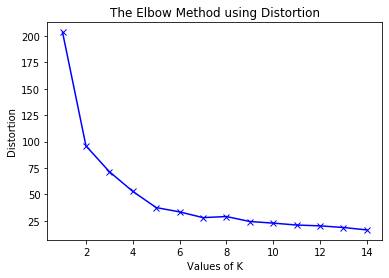

In [75]:
plt.plot(K, distortions, 'bx-') 
plt.xlabel('Values of K') 
plt.ylabel('Distortion') 
plt.title('The Elbow Method using Distortion') 
plt.show()

We can see that there is a pronunciated elbow around *k = 5*, so let's use that number of clusters.

In [76]:
## Set number of clusters
kclusters = 5

## Run k-means clustering
kmeans = KMeans(n_clusters = kclusters, random_state = 0).fit(X)

## Check cluster labels generated for each row in the dataframe
kmeans.labels_[0:10]

array([0, 0, 2, 0, 3, 0, 0, 3, 0, 0])

Let's append the cluster labels results to a copy of our dataframe.

In [77]:
berlin_merged = neighborhood_df.copy()
berlin_merged.insert(0, 'Cluster Labels', kmeans.labels_)
berlin_merged

,Cluster Labels,Neighborhood,Borough,Latitude,Longitude,Avg Price,Total Count,Hotels,Restaurants
0,0,Adlershof,Treptow - Köpenick,52.436802,13.547116,21.480108,31,0,2
1,0,Albrechtstr.,Steglitz - Zehlendorf,52.455627,13.337145,21.646389,119,0,3
2,2,Alexanderplatz,Mitte,52.522387,13.404324,61.899000,1255,8,12
3,0,Allende-Viertel,Treptow - Köpenick,52.447843,13.598447,22.087302,3,0,1
4,3,Alt Treptow,Treptow - Köpenick,52.490437,13.450552,23.093964,185,0,7
...,...,...,...,...,...,...,...,...,...
132,0,Wilhelmstadt,Spandau,52.525758,13.189837,25.102564,39,0,2
133,0,Zehlendorf Nord,Steglitz - Zehlendorf,52.447411,13.261869,31.175571,73,0,0
134,0,Zehlendorf Südwest,Steglitz - Zehlendorf,52.421631,13.172213,27.789003,59,1,1
135,1,nördliche Luisenstadt,Friedrichshain-Kreuzberg,52.501651,13.427058,26.680173,475,0,38


And let's plot the resulting clustering in a Berlin map.

In [86]:
# Create Map
latitude = 52.5200
longitude = 13.4050
berlin_map = folium.Map(location = [latitude, longitude], zoom_start = 11)

## Color scheme
x = np.arange(kclusters)
ys = [i + x + (i*x)**2 for i in range(kclusters)]
colors_array = cm.rainbow(np.linspace(0, 1, len(ys)))
rainbow = [colors.rgb2hex(i) for i in colors_array]

## Add markers
markers_colors = []

berlin_dropped = berlin_merged.dropna()

for lat, lon, poi, cluster in zip(berlin_dropped['Latitude'], berlin_dropped['Longitude'], berlin_dropped['Neighborhood'], berlin_dropped['Cluster Labels']):
    
    label = folium.Popup(str(poi) + ' Cluster ' + str(cluster), parse_html=True)
    
    folium.CircleMarker(
        [lat, lon],
        radius=5,
        popup=label,
        color=rainbow[int(cluster - 1)],
        fill=True,
        fill_color=rainbow[int(cluster - 1)],
        fill_opacity=0.7).add_to(berlin_map)

berlin_map

## Results

We can now inspect closely the results for each cluster. We are specially interested in looking at the **Average Price**, **Total Count**, **Hotels** and **Restaurants** columns.

#### Cluster 0

In [80]:
berlin_dropped.loc[berlin_dropped['Cluster Labels'] == 0][['Neighborhood','Borough','Avg Price','Total Count','Hotels','Restaurants']]

,Neighborhood,Borough,Avg Price,Total Count,Hotels,Restaurants
0,Adlershof,Treptow - Köpenick,21.480108,31,0,2
1,Albrechtstr.,Steglitz - Zehlendorf,21.646389,119,0,3
3,Allende-Viertel,Treptow - Köpenick,22.087302,3,0,1
5,Alt-Hohenschönhausen Nord,Lichtenberg,21.358844,14,0,1
6,Alt-Hohenschönhausen Süd,Lichtenberg,21.082846,44,1,3
...,...,...,...,...,...,...
130,Westend,Charlottenburg-Wilm.,27.670811,117,1,5
131,Wiesbadener Straße,Charlottenburg-Wilm.,27.909770,58,0,5
132,Wilhelmstadt,Spandau,25.102564,39,0,2
133,Zehlendorf Nord,Steglitz - Zehlendorf,31.175571,73,0,0


#### Cluster 1

In [81]:
berlin_dropped.loc[berlin_dropped['Cluster Labels'] == 1][['Neighborhood','Borough','Avg Price','Total Count','Hotels','Restaurants']]

,Neighborhood,Borough,Avg Price,Total Count,Hotels,Restaurants
50,Helmholtzplatz,Pankow,32.877516,488,0,28
53,Karl-Marx-Allee-Nord,Friedrichshain-Kreuzberg,25.281627,334,1,1
54,Karl-Marx-Allee-Süd,Friedrichshain-Kreuzberg,25.859384,383,2,3
74,Moabit Ost,Mitte,23.804617,429,1,10
75,Moabit West,Mitte,22.326451,525,0,24
86,Osloer Straße,Mitte,22.037519,414,2,4
93,Parkviertel,Mitte,18.875517,384,0,8
95,Prenzlauer Berg Nord,Pankow,24.741871,438,0,12
111,Schöneberg-Nord,Tempelhof - Schöneberg,89.094846,577,3,20
112,Schöneberg-Süd,Tempelhof - Schöneberg,24.637210,485,0,34


#### Cluster 2

In [83]:
berlin_dropped.loc[berlin_dropped['Cluster Labels'] == 2][['Neighborhood','Borough','Avg Price','Total Count','Hotels','Restaurants']]

,Neighborhood,Borough,Avg Price,Total Count,Hotels,Restaurants
2,Alexanderplatz,Mitte,61.899000,1255,8,12
33,Frankfurter Allee Süd FK,Friedrichshain-Kreuzberg,25.071870,1466,0,32
102,Reuterstraße,Neukölln,24.118911,1091,0,25
119,Tempelhofer Vorstadt,Friedrichshain-Kreuzberg,27.671989,1368,1,25


####  Cluster 3

In [84]:
berlin_dropped.loc[berlin_dropped['Cluster Labels'] == 3][['Neighborhood','Borough','Avg Price','Total Count','Hotels','Restaurants']]

,Neighborhood,Borough,Avg Price,Total Count,Hotels,Restaurants
4,Alt Treptow,Treptow - Köpenick,23.093964,185,0,7
7,Alt-Lichtenberg,Lichtenberg,22.104933,174,1,1
17,Brunnenstr. Nord,Mitte,27.055848,301,0,0
27,Düsseldorfer Straße,Charlottenburg-Wilm.,39.050163,205,4,27
34,Friedenau,Tempelhof - Schöneberg,24.685377,212,1,17
52,Kantstraße,Charlottenburg-Wilm.,28.362777,156,1,34
58,Kurfürstendamm,Charlottenburg-Wilm.,44.305928,160,8,47
77,Neu Lichtenberg,Lichtenberg,21.327316,266,2,1
80,Neue Kantstraße,Charlottenburg-Wilm.,44.545485,169,0,17
90,Otto-Suhr-Allee,Charlottenburg-Wilm.,26.488284,185,1,10


#### Cluster 4

In [85]:
berlin_dropped.loc[berlin_dropped['Cluster Labels'] == 4][['Neighborhood','Borough','Avg Price','Total Count','Hotels','Restaurants']]

,Neighborhood,Borough,Avg Price,Total Count,Hotels,Restaurants
18,Brunnenstr. Süd,Mitte,33.863272,861,1,20
31,Frankfurter Allee Nord,Friedrichshain-Kreuzberg,29.774940,757,0,12
81,Neuköllner Mitte/Zentrum,Neukölln,21.770421,842,0,14
96,Prenzlauer Berg Nordwest,Pankow,25.984741,702,0,14
98,Prenzlauer Berg Süd,Pankow,30.758178,634,0,22
99,Prenzlauer Berg Südwest,Pankow,31.523641,679,1,29
103,Rixdorf,Neukölln,21.350045,920,0,6
106,Schillerpromenade,Neukölln,23.455187,705,1,21
122,Wedding Zentrum,Mitte,24.447208,603,0,19
136,südliche Luisenstadt,Friedrichshain-Kreuzberg,26.276013,686,0,24


## Discussion

We can identify certain tendencies and patterns in our clusters, for example:

* In **Cluster 0**, the amount of venues, restaurants and hotels is quite low, and so is the number of Airbnb hosts. The prices are also slightly lower compared to other clusters, so it might be a bad idea to invest in these neighborhoods. These are the neighborhoodss in the outer city.

* All the neighborhoods in **Cluster 1** are well located in the city center, or close to the more crowded neighborhoods. Also, they have a nice amount of venues and facilities, and the Airbnb offer is not as big as in clusters 2 and 4. This is definitely a market worth looking at.

* **Cluster 2** contains the most crowded neighborhoods, including Alexanderplatz and Frankfurter Allee Süd. However, the prices for Alexanderplatz are considerably higher compared to other neighborhoods in the same cluster and with more or less the same offers. It might be interesting to invest in one of these neighborhoods, depending on the housing costs.

* **Cluster 3** is more disperse across the city, and seem to include more residential areas. These neighborhoods are probably not so interesting for an investment.

* **Cluster 4** is slightly more crowded than Cluster 2, and doesn't seem to have as many restaurants. However, some of the neighborhoods are very well located in touristic places, like the ones in Friedrichsain-Kreuzberg or Neukölln.

## Conclusion

Although we could get some useful insight from the Berlin neighborhoods, this is only one of the analysis that we can do with the data sources we got. We could include more information like the ratings of the Airbnb hosts, other kinds of venues from Foursquare, geographical information about places like museums, airports and landmarks and so on.